In [101]:
%pip install plotly
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, plot_confusion_matrix, accuracy_score, confusion_matrix
%matplotlib inline


Note: you may need to restart the kernel to use updated packages.


In [73]:
train = pd.read_csv('train_data.csv')

In [74]:
test = pd.read_csv('test_data.csv')

In [75]:
train = train.drop('case_id', axis= 1)
train['dataset']='train'

In [76]:
test = test.drop('case_id', axis= 1)
test['dataset']='test'

In [77]:
data = pd.concat([train, test])

In [78]:
data.shape

(455495, 18)

In [104]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,test
137053,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,test
137054,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,test
137055,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,test


In [105]:
ds = data.groupby(['Hospital_code'])['patientid'].count().reset_index()
ds.columns = ['hospital', 'count']

In [106]:
ds

,hospital,count
0,1,7460
1,2,7277
2,3,10277
3,4,1749
4,5,7448
5,6,29221
6,7,1871
7,8,5284
8,9,16360
9,10,13538


Text(0.5, 1.0, 'cases per hospital distribution')

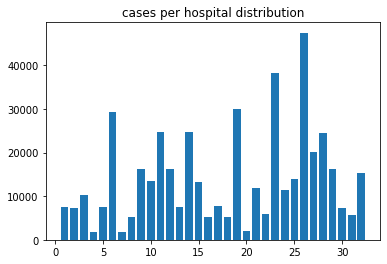

In [109]:
plt.bar(ds['hospital'], ds['count'])
plt.title('cases per hospital distribution')

In [110]:
ds = data.groupby(['Hospital_type_code'])['patientid'].count().reset_index()
ds.columns = ['hospital_type', 'count']

Text(0.5, 1.0, 'cases hospital type distribution')

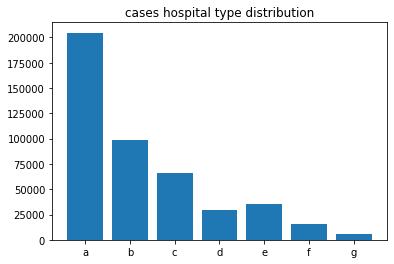

In [111]:
plt.bar(ds['hospital_type'], ds['count'])
plt.title('cases hospital type distribution')

In [112]:
ds = data.groupby(['Hospital_region_code'])['patientid'].count().reset_index()
ds.columns = ['hospital_region', 'count']

Text(0.5, 1.0, 'cases hospital region distribution')

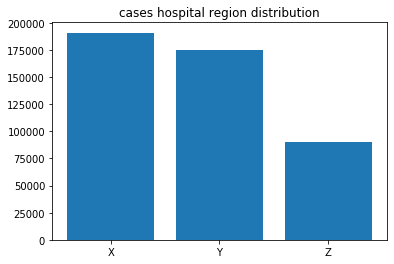

In [113]:
plt.bar(ds['hospital_region'], ds['count'])
plt.title('cases hospital region distribution')

In [114]:
ds = data.groupby(['Department'])['patientid'].count().reset_index()
ds.columns = ['Department', 'count']

Text(0.5, 1.0, 'cases hospital region distribution')

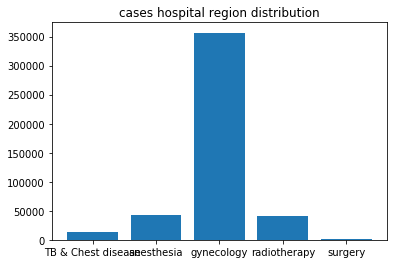

In [121]:
ds = data.groupby(['Ward_Type'])['patientid'].count().reset_index()
ds.columns = ['Ward_Type', 'count']
ds

,Ward_Type,count
0,P,7199
1,Q,152046
2,R,182939
3,S,111166
4,T,2133
5,U,12


Text(0.5, 1.0, 'ward type distribution')

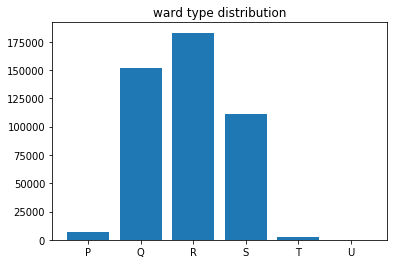

In [119]:
plt.bar(ds['Ward_Type'], ds['count'])
plt.title('ward type distribution')

Text(0.5, 1.0, 'Number of Ward Type')

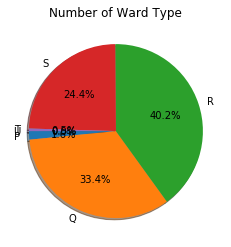

In [123]:
plt.pie(ds['count'], labels= ds['Ward_Type'], autopct='%.1f%%',
        shadow=True, startangle=180)
plt.title('Number of Ward Type')

In [126]:
data.loc[data['Stay'] == '0-10', 'Stay'] = 0
data.loc[data['Stay'] == '11-20', 'Stay'] = 1
data.loc[data['Stay'] == '21-30', 'Stay'] = 2
data.loc[data['Stay'] == '31-40', 'Stay'] = 3
data.loc[data['Stay'] == '41-50', 'Stay'] = 4
data.loc[data['Stay'] == '51-60', 'Stay'] = 5
data.loc[data['Stay'] == '61-70', 'Stay'] = 6
data.loc[data['Stay'] == '71-80', 'Stay'] = 7
data.loc[data['Stay'] == '81-90', 'Stay'] = 8
data.loc[data['Stay'] == '91-100', 'Stay'] = 9
data.loc[data['Stay'] == 'More than 100 Days', 'Stay'] = 10

In [152]:
# linear model only on numerical features
features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient', 'Admission_Deposit']
m = train['Bed Grade'].mean()
train['Bed Grade'].fillna(m, inplace = True)
X = train[features]
y = train['Stay']

0

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size= 0.2)

In [154]:
X_train.shape

(254750, 4)

In [155]:
X_test.shape

(63688, 4)

In [156]:
y_train.shape

(254750,)

In [157]:
y_test.shape

(63688,)

In [159]:
model = LogisticRegression()

In [160]:
model.fit(X_train, y_train)

C:\Users\elnaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [161]:
y_predicted = model.predict(X_test)

In [163]:
y_predicted

array(['31-40', '11-20', '21-30', ..., '51-60', '11-20', '11-20'],
      dtype=object)

In [166]:
print('accuracy of baseline: ', accuracy_score(y_test, y_predicted)*100, '%')

accuracy of baseline:  35.02386634844869 %


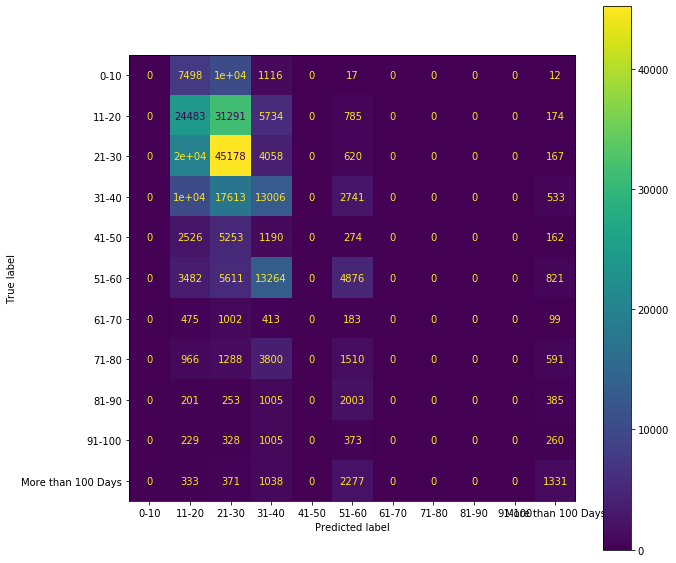

In [171]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_train, y_train, ax=ax)

In [174]:
#fit categorical variables:

need_to_encode = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness']
for column in need_to_encode:
    le = preprocessing.LabelEncoder()
    le.fit(data[column])
    data[column] = le.transform(data[column])

In [176]:
data.loc[data['Age'] == '0-10', 'Age'] = 0
data.loc[data['Age'] == '11-20', 'Age'] = 1
data.loc[data['Age'] == '21-30', 'Age'] = 2
data.loc[data['Age'] == '31-40', 'Age'] = 3
data.loc[data['Age'] == '41-50', 'Age'] = 4
data.loc[data['Age'] == '51-60', 'Age'] = 5
data.loc[data['Age'] == '61-70', 'Age'] = 6
data.loc[data['Age'] == '71-80', 'Age'] = 7
data.loc[data['Age'] == '81-90', 'Age'] = 8
data.loc[data['Age'] == '91-100', 'Age'] = 9

In [177]:
categorical = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 
              'City_Code_Patient', 'Type of Admission', 'Severity of Illness']

In [178]:
train = data[data['dataset']=='train']
test = data[data['dataset']=='test']

target = train['Stay']
train = train.fillna(0)
test = test.fillna(0)
train = train.drop(['patientid', 'dataset', 'Stay'], axis=1)
test = test.drop(['patientid', 'dataset'], axis=1)
train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,8,2,3,2,3,3,2,5,2.0,7.0,0,0,2,5,4911.0
1,2,2,5,2,2,3,3,5,2.0,7.0,1,0,2,5,5954.0
2,10,4,1,0,2,1,3,4,2.0,7.0,1,0,2,5,4745.0
3,26,1,2,1,2,3,2,3,2.0,7.0,1,0,2,5,7272.0
4,26,1,2,1,2,3,3,3,2.0,7.0,1,0,2,5,5558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,0,6,0,3,3,1,5,4.0,23.0,0,2,3,4,4144.0
318434,24,0,1,0,2,1,1,4,4.0,8.0,2,2,4,8,6699.0
318435,7,0,4,0,3,2,2,5,4.0,10.0,0,1,3,7,4235.0
318436,11,1,2,1,3,1,1,3,3.0,8.0,1,1,5,1,3761.0


In [179]:
X, X_val, y, y_val = train_test_split(train, target, random_state=0, test_size=0.2, shuffle=True)
y=y.astype('int')
y_val=y_val.astype('int')

In [180]:
model = LGBMClassifier(random_state=666)
model.fit(X, y, categorical_feature=categorical)
preds = model.predict(X_val)
print('LGBM accuracy: ', accuracy_score(y_val, preds)*100, '%')

C:\Users\elnaz\anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning:

Using categorical_feature in Dataset.



LGBM accuracy:  42.76629820374325 %


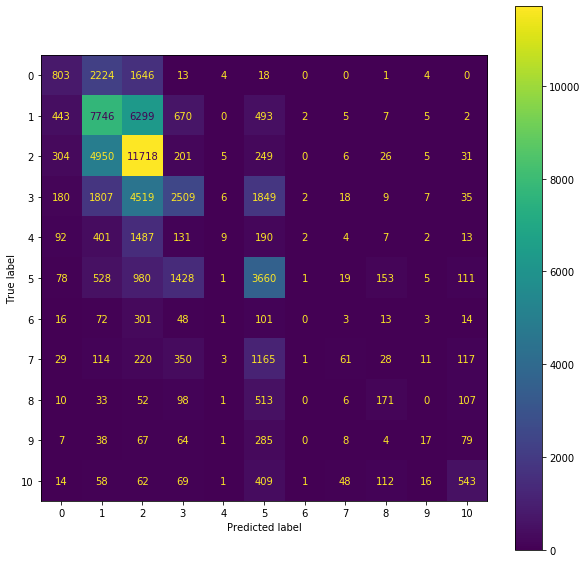

In [182]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_val, y_val, ax=ax)